In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/Advertising.csv', index_col=0)

data.head() # Show first 5 rows

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.tail() # Show last 5 rows

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 4)

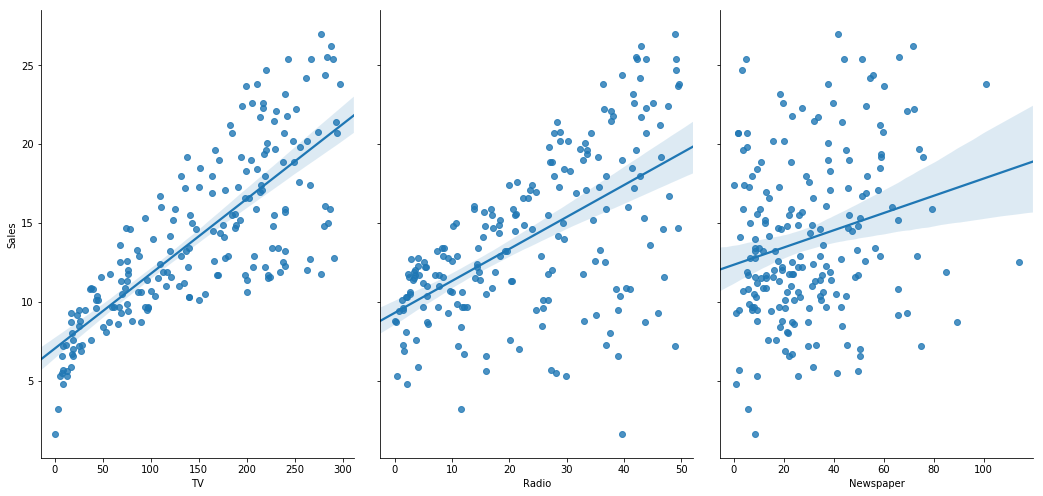

In [5]:
import seaborn as sns

%matplotlib inline

sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [6]:
X = data[['TV', 'Radio', 'Newspaper']]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [7]:
print(X.shape)
print(type(X))

(200, 3)
<class 'pandas.core.frame.DataFrame'>


In [8]:
y = data['Sales']

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [9]:
print(y.shape)
print(type(y))

(200,)
<class 'pandas.core.series.Series'>


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [12]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [14]:
feature_cols = ['TV', 'Radio', 'Newspaper']

list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088833),
 ('Newspaper', 0.0034504647111804343)]

For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

## Model evaluation metrics for linear regression
We need evaluation metrics designed for comparing continuous values

In [15]:
# Define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

### Mean Absolute Error (MAE)
The sum of the differences between the true and predicted value divide by the number of responses

In [16]:
print((10+0+20+10)/4)

10.0


In [17]:
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


### Mean Squared Error (MSE)

In [18]:
print((10**2 + 0**2 + 20**2 + 10**2)/4)

150.0


In [19]:
print(metrics.mean_squared_error(true, pred))

150.0


### Root Mean Squared Error (RMSE)

In [21]:
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

12.24744871391589


In [22]:
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


Comparing these metrics:
* **MAE** is the easiest way, because it's the average error
* **MSE** is more pupular, because it "punishes" larger errors
* **RMSE** is the most popular, because it is interpretable by "y" units

## Computing the RSME for our Sales predictions

In [24]:
y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


This seems pretty good, because our sales ranged from about 5 to 25

## Does Newspaper improve the quality of our predictions?

In [25]:
feature_cols = ['TV', 'Radio']

X = data[feature_cols]

y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


Lower numbers for RMSE are better. Newspaper should be removed from the model.